## Die Aufgabe des schwimmenden Hundes wurde bereits in Experimentalphysik (Blatt 2, Aufgabe 2.5) gestellt und lautet wie folgt: 

Ein Hund entdeckt sein Frauchen am anderen Ufer eines Flusses, springt genau
gegenüber ins Wasser und schwimmt immer genau in Richtung auf das
Frauchen zu, obwohl ihn die Strömung abtreibt.

1. Wie lange braucht er um ans andere Ufer zu kommen?
2. Welche Kurve beschreibt er dabei?

Nehmen Sie an, dass der Fluss eine konstante und überall gleiche
Geschwindigkeit hat. Betrachten Sie die Fälle in denen der Hund schneller,
gleichschnell und langsamer als die Strömungsgeschwindigkeit des Flusses
schwimmt.

## Lösung der Aufgabe
### Aufstellen der DGL

Angenommen der Hund Rantanplan befindet sich zum Zeitpunkt $t=0$ im Punkt $(0,-1)$ und möchte zu seinem Herrchen am Punkt $(0,1)$ auf der anderen Flussseite gelangen, wobei der Fluss die Strömungsgeschwindigkeit $(c,0)$ hat. Die Geschwindigkeit des Hundes $v$ zeigt immer in Richtung des Herrchens, sodass sich der Geschwindigkeitsvektor
$$
    (\dot{x}(t),\dot{y}(t)) = v\cdot\frac{(0,1)-(x(t),y(t))}{\sqrt{x^2(t)+y^2(t)}} + (c,0)
$$
ergibt.

Um eine analytische Lösung dieser gekoppelten Differenzialgleichungen zu berechnen bedarf es einiger Anstrengung. Man kann die Aufgabe auch numerisch am Computer lösen. Das kann auch vor allem dann hilfreich sein, wenn die zu untersuchende DGL keine geschlossene analytische Lösung besitzt. Hierfür kann das folgende Python-Skript verwendet werden.

### Implementierung in Python

Zum numerischen Lösen kann die Funktion solve_ivp (solve initial-value problem) aus der scipy.integrate-Bibliothek verwendet werden, die hier zusammen mit anderen wichtigen Bibliotheken importiert wird.



In [1]:
import numpy as np
import scipy.integrate as integ          #Zum Lösen des Anfangswertproblems
from matplotlib import pyplot as plt     #Zum Plotten der Lösung
plt.rcParams.update({'font.size': 16})

Als nächstes müssen die DGLs, also $v(t)$, und die Geschwindigkeiten von Hund und Fluss ($vh$ und $vf$), sowie die Anfangspositionen von Hund und Herrchen ($r0$ und $r1$) in den Code implementiert werden:

In [2]:
vh = 1.0                 #Geschwindigkeit Hund
vf = np.array([0.7,0])   #Geschwindigkeitsvector Fluss

r0 = np.array([0,-1])    #Anfangsposition Hund
r1 = np.array([0,1])     #Position Herrchen


def vrantanplan(t,r):    
    v = r1-r                                       #Richtung von v
    return v/np.sqrt(v[0]**2+v[1]**2)*vh + vf    #v(t)

#Hier vlassie einfügen
#def vlassie(t,r):
#       return 

Dieses Anfangswertproblem kann nun numerisch integriert werden.

In [3]:
tmax = 5.0 #Integrationsbereich
rantanplan = integ.solve_ivp(vrantanplan, [0,tmax],r0,dense_output=True)
#lassie = integ.solve_ivp(vlassie, [0,tmax],r0,dense_output=True)      #Für Aufgabe # entfernen

print(rantanplan.message)
#print(lassie.message)                                                 #Für Aufgabe # entfernen

The solver successfully reached the end of the integration interval.


Jetzt kann die Lösung geplottet werden.

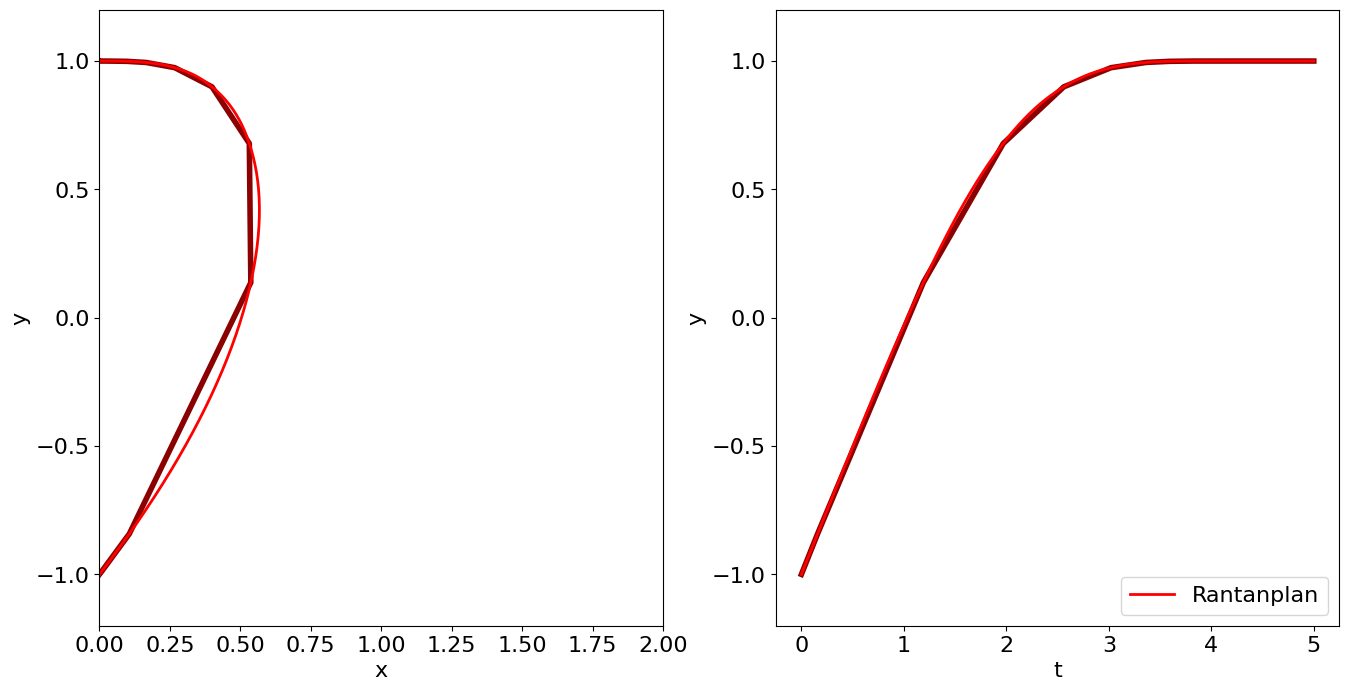

In [4]:
[fig, (ax1,ax2)] = plt.subplots(1, 2)
fig.set_size_inches(16, 8)
ax1.plot(rantanplan.y[0,:],rantanplan.y[1,:],color='darkred',linewidth=4)
#ax1.plot(lassie.y[0,:],lassie.y[1,:],color='darkblue',linewidth=4)        #Für Aufgabe # entfernen

tinterp = np.linspace(0,tmax,100)
rinterp = rantanplan.sol(tinterp)
#linterp = lassie.sol(tinterp)                                             #Für Aufgabe # entfernen
ax1.plot(rinterp[0,:],rinterp[1,:],color='red',linewidth=2)
#ax1.plot(linterp[0,:],linterp[1,:],color='blue',linewidth=2)              #Für Aufgabe # entfernen

ax1.set_ylabel('y')
ax1.set_xlabel('x')
ax1.set_ylim([-1.2, 1.2])
ax1.set_xlim([0, 2])

ax2.plot(rantanplan.t,rantanplan.y[1,:],color='darkred',linewidth=4)
#ax2.plot(lassie.t,lassie.y[1,:],color='darkblue',linewidth=4)            #Für Aufgabe # entfernen
ax2.plot(tinterp,rinterp[1,:],color='red',linewidth=2,label='Rantanplan')
#ax2.plot(tinterp,linterp[1,:],color='blue',linewidth=2,label='Lassie')   #Für Aufgabe # entfernen
ax2.set_ylabel('y')
ax2.set_xlabel('t')
ax2.set_ylim([-1.2, 1.2])
ax2.legend(loc="lower right")

#plt.savefig('dgl_hund.png') 
plt.show()

## Aufgabe
Angenommen die Hündin Lassie hat ihr Herrchen auf der anderen Seite des Flusses erblickt und möchte zu ihm. Sie möchte aber nur möglichst kurz im Wasser bleiben und schwimmt deshalb mit der Geschwindigkeit $(0,vh)$ orthogonal zur Fließrichtung bis sie das andere Flussufer erreicht, um dann mit der Geschwindigkeit $-2vf$ zu ihrem Herrchen zu rennden. 

1. Implementieren Sie den Geschwindigkeitsvektor von Lassie an der gekennzeichneten Stelle im obigen Code. (Die if-funktion könnte hierfür nützlich sein.)
2. Plotten Sie die Trajektorien der beiden Hunde (entfernen der # im Plotskript).
3.  Welcher Hund ist schneller? Berechnen Sie in der nachfolgenden Zelle den Abstand zwischen Hund und Herrchen $d(t)$  und stellen Sie diesen in einem $d$-$t$-Diagramm für beide Hunde dar.
4.  Überlegen Sie sich eine interessante Fragestellung im Zusammenhang mit dieser Aufgabe und implementieren Sie deren Lösung.

In [5]:
# Aufgabe 3: Abstand zwischen Hund und Herrchen hier
